In [4]:
PROJECT_ROOT = '..'
PLOTS_PATH = f'{PROJECT_ROOT}/plots'
CSV_FOLDER = 'csv'
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

%run _utils.ipynb

issues = load_issues()

/Users/BenRombaut/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (14,16,17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# How often is Greenkeeper opening issues?

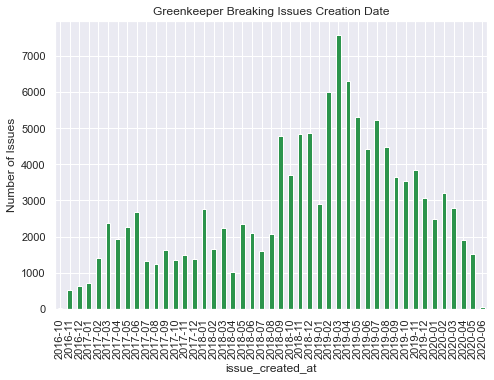

In [5]:
sns.set()
issues_grouped = issues.groupby(issues["issue_created_at"].dt.to_period('M'))
issues_grouped['issue_created_at'].count()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Number of Issues')
ax.set_xlabel('Created At')
ax.set_title('Greenkeeper Breaking Issues Creation Date')
issue_creation_date = \
    issues_grouped['issue_created_at']\
        .count()\
        .plot(
            kind="bar",
            color=GK_GREEN
        )
plt.show()

# Closing Issues & Response Times

In [6]:
len(issues)

123197

## How often are Greenkeeper Build Breakage Issue Reports closed?

In [3]:
n_issues = len(issues)
closed_issues = issues[issues.issue_state == "closed"]
percent_closed = calculate_percent(len(closed_issues), n_issues)
print(f"{percent_closed}% ({len(closed_issues)}) of Greenkeeper issues are eventually closed")

79.82% (98341) of Greenkeeper issues are eventually closed


## How much time do Greenkeeper issues take to be closed?

In [4]:
time_to_close_issue = pd.DataFrame({
    'issue_id': closed_issues.issue_id, 
    'time_to_close_issue': closed_issues.apply(lambda row: row.issue_closed_at - row.issue_created_at, axis=1),
})

median_time = time_to_close_issue['time_to_close_issue'].median()
print(f"The median time to close the issue is {median_time} hours")
print("Five number summary for the time to close the Greenkeeper issue:")
print(time_to_close_issue['time_to_close_issue'].describe())


The median time to close the issue is 4 days 11:04:25 hours
Five number summary for the time to close the Greenkeeper issue:
count                         98341
mean     43 days 04:48:28.851343794
std      98 days 22:44:48.052636698
min                 0 days 00:00:04
25%                 0 days 09:58:19
50%                 4 days 11:04:25
75%                35 days 07:48:16
max              1219 days 02:01:10
Name: time_to_close_issue, dtype: object


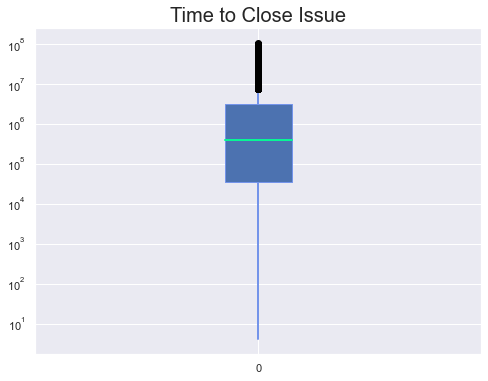

In [22]:
sns.set()
fig, ax = plt.subplots(figsize=(8, 6))

# time_to_close_issue['val'] = \
#     np.log10(time_to_close_issue['time_to_close_issue'].astype('timedelta64[s]'))

time_to_close_issue['val'] = \
    time_to_close_issue['time_to_close_issue'].astype('timedelta64[s]')

params = dict(
    data=time_to_close_issue,
    y='val',
)


# ax = sns.boxplot(
#     **params,
# )
# ax.set_yscale("log")
# g = sns.violinplot(
#     **params,
#     color=GK_GREEN,
#     linewidth=0.5,
# )

bp = ax.boxplot(
    data=time_to_close_issue,
    x='val',
    patch_artist=True,
    positions=np.array([0]),
    showcaps=False,
#     whis='range',
    boxprops=dict(
        alpha=1,
        color=GK_PURPLE,
    ),
    whiskerprops=dict(
        color=GK_PURPLE,
        linewidth=2,
    ),
    medianprops=dict(
        color=GK_GREEN_LIGHT,
        linewidth=2,
    )
)
ax.set_yscale("log")
ax.set_title(f'Time to Close Issue', fontsize=20)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('', fontsize=20)

# y_seconds = [10 ** y for y in g.get_yticks()[:-1]]
# ylabels = [strfdelta(x, "{days} days {hours}:{minutes}:{seconds}") for x in pd.to_timedelta(y_seconds, unit='s')]
# g.set_yticklabels(ylabels)
# g.set_xticklabels(labels=[])
plt.show()
fig.tight_layout()
# save_plot(fig, 'time_to_close_issue.png')